In [ ]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
#load the dataset

import pandas as pd

df = pd.read_csv('superstore-dataset-final/Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#clean the data

df.info()

#check the missing value count
print(df.isnull().sum())

#drop the row how has multiple missing values
df.dropna(inplace=True)

#converr the Order Date and Ship Date column into the Datetime column
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

#removes the duplicates from the datasets
df.drop_duplicates(inplace=True)

#change the column name if column name contains the space then the take it as the unerscore
df.columns=[col.strip().replace(" ","_").lower() for col in df.columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

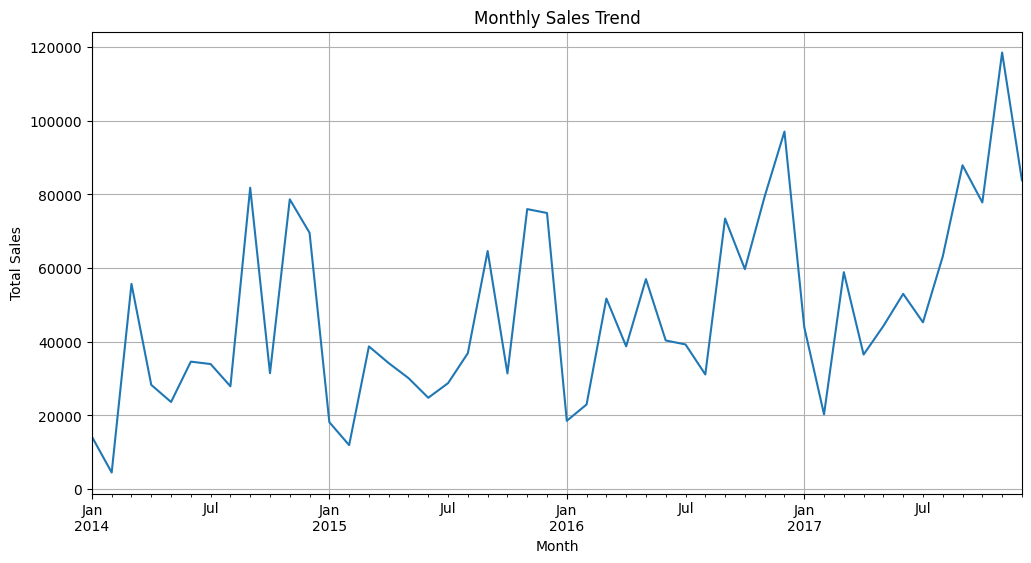

In [ ]:
#Total Sales per month
df['month_year']=df['order_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['sales'].sum()

monthly_sales.plot(kind='line',figsize=(12,6),title="Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

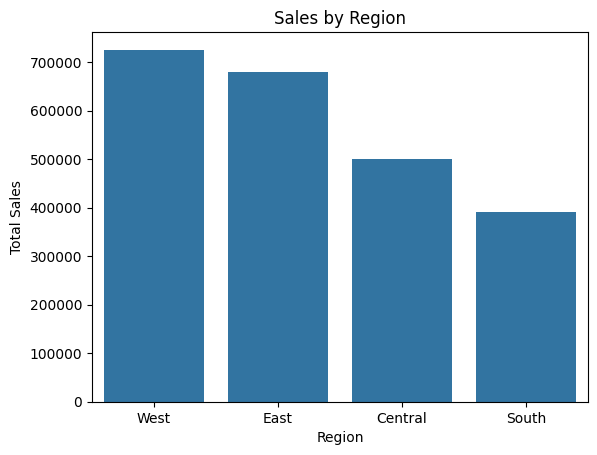

In [ ]:
#sales by region

region_sales=df.groupby('region')['sales'].sum().sort_values(ascending=False)

sns.barplot(x=region_sales.index,y=region_sales.values)
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()


In [ ]:
#customer Segment

segment_sales=df.groupby('segment')['sales'].sum()

fig=px.pie(values=segment_sales.values,names=segment_sales.index,title="Sales by costumber segment")
fig.show()

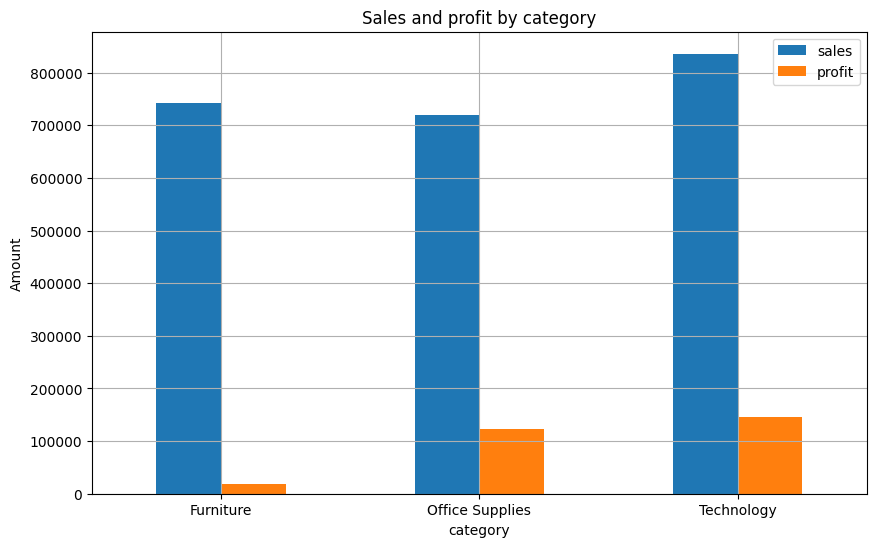

In [ ]:
category_perf=df.groupby('category')[['sales','profit']].sum()

category_perf.plot(kind='bar',figsize=(10,6),title="Sales and profit by category")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.grid()
plt.show()


In [ ]:
df.to_csv('claened_superstore.csv',index=False)

In [ ]:
plt.savefig('monthly_sales.png')

<Figure size 640x480 with 0 Axes>